In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy
from scipy.stats import multivariate_normal
import pandas as pd
import sklearn
import random
from sklearn import metrics

## Handwritten digit recognition using a Gaussian generative model. ##
MNIST data set of handwritten digits can be obtained it from:

http://yann.lecun.com/exdb/mnist/index.html

Here, we will build a classifier for this data, by modeling each class as a multivariate
(784-dimensional) Gaussian.

Upon downloading the data, we have two training files (one with images, one with labels)
and two test files

 We load the data which sets x to a 60000 × 784 array where each row corresponds to an image, and y to a
length-60000 array where each entry is a label (0-9). 

In [4]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [5]:
%cd /Users/Garrett/Documents/DSE/DSE210Notes/Day_3/MNIST\ Data

x,y = loadmnist('trainimagesidx3ubyte', 'trainlabelsidx1ubyte')


/Users/Garrett/Documents/DSE/DSE210Notes/Day_3/MNIST Data


In [6]:
xtest,ytest = loadmnist('t10kimagesidx3ubyte','t10klabelsidx1ubyte')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

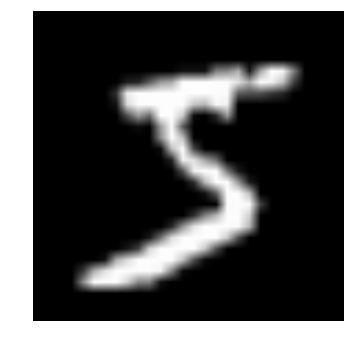

In [7]:
print(x[0])
displaychar(x[0])

In [8]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


## Split the training set into two pieces ##  
one training set of size 50000, and one separate validation set of size 10000


In [9]:
from sklearn.model_selection import train_test_split

xtrain, xvalidation, ytrain, yvalidation = train_test_split(x, y, test_size=0.166666, random_state=79)

print('The shape of x training data is {}').format(xtrain.shape)
print('The shape of x validation data is {}').format(xvalidation.shape)
print('The shape of y train data is {}').format(ytrain.shape)
print('The shape of y validation data is {}').format(yvalidation.shape)


The shape of x training data is (50000, 784)
The shape of x validation data is (10000, 784)
The shape of y train data is (50000,)
The shape of y validation data is (10000,)


## Fitting a Gaussian generative model to the training data of 50000 points:##


Using these two pieces of information, we can classify new images x using Bayes’ rule: simply
pick the digit j for which π<sub>j</sub>P<sub>j</sub> (x) is largest.



• Determine the class probabilities: what fraction π0 of the training points are digit 0, for
instance? Call these values π<sub>0</sub>, . . . , π<sub>9</sub>.

• Fit a Gaussian to each digit, by finding the mean and the covariance of the corresponding
data points. Let the Gaussian for the j<sup>th</sup> digit be P<sub>j</sub> = N(µ<sub>j</sub> , Σ<sub>j</sub> ).

## sklearn has a built in Gaussian Naive Bayes class. Lets see how it performs ##

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB(priors=None)

In [15]:
priors = gnb.class_prior_

for i in range(len(priors)):
    print("The class distribution of {0} in the training set is {1:.4}").format(i, priors[i])

The class distribution of 0 in the training set is 0.09946
The class distribution of 1 in the training set is 0.1118
The class distribution of 2 in the training set is 0.09936
The class distribution of 3 in the training set is 0.1017
The class distribution of 4 in the training set is 0.09772
The class distribution of 5 in the training set is 0.0901
The class distribution of 6 in the training set is 0.09906
The class distribution of 7 in the training set is 0.1048
The class distribution of 8 in the training set is 0.09694
The class distribution of 9 in the training set is 0.09902


In [16]:
skgnbvalidate = gnb.predict(xvalidation)
skgnbvalidate.shape

(10000,)

In [17]:
print(metrics.classification_report(yvalidation, skgnbvalidate))
Accuracy = metrics.accuracy_score(yvalidation, skgnbvalidate)
print("Accuracy = " + str(Accuracy))
print('Error Rate = ' + str(1-Accuracy))

             precision    recall  f1-score   support

          0       0.76      0.88      0.81       950
          1       0.79      0.95      0.86      1151
          2       0.85      0.31      0.45       990
          3       0.75      0.39      0.51      1044
          4       0.88      0.19      0.31       956
          5       0.62      0.08      0.14       916
          6       0.66      0.92      0.77       965
          7       0.92      0.29      0.44      1026
          8       0.30      0.65      0.41      1004
          9       0.38      0.94      0.54       998

avg / total       0.69      0.57      0.53     10000

Accuracy = 0.5664
Error Rate = 0.4336


## We can see that we achieve an error rate of ~43% using sklearn's gaussian naive bayes which is far from the ideal ##

Lets try building our own classifier

We start by separating each class into their own matrices 

In [19]:
def get_each_class(class_id):
    examples = []
    for i, example in enumerate(xtrain):
        if ytrain[i]==class_id:
            examples.append(example)
            

    examples = np.matrix(examples)
    return examples

examples = get_each_class(0)
print("The shape of the matrix of items in class 0 is {}").format(examples.shape)

The shape of the matrix of items in class 0 is (4973, 784)


Then we find the mean, covariance, and bayesian posterior probabilities for each class

P<sub>j</sub>=N(μ<sub>j</sub>,Σj)
 

In [105]:
classes = gnb.classes_
def get_posteriors (class_list):
    posterior = []
    for j in class_list:
        grouping = get_each_class(j)
        mean = np.array(grouping.mean(0))[0]
        cov = np.cov(grouping.T)
        Px = multivariate_normal(mean=mean,cov=cov, allow_singular=True)
        posterior.append(Px)
    return posterior

posterior = get_posteriors(classes)

## Lets test a prediction simply using Bayes probabilities##

Using just bayes probabilities, we'll select one image and predict an image from the validation set

The probabilities for each class are
[[0, 0.0], [1, 0.0], [2, 0.0], [3, 0.0], [4, 0.0], [5, 0.0], [6, 0.0], [7, 0.0], [8, 0.0], [9, 0.0]]
The prediction for a random selection is 6
Let's see what the actual picure is


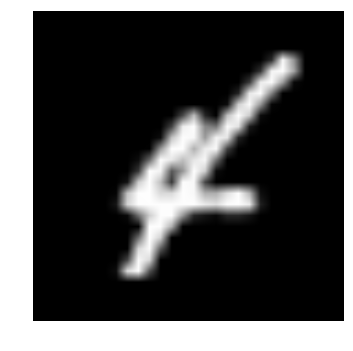

In [100]:
xchoice = random.choice (xvalidation)
bayes_prob = []
for c in classes:
    prob = [c, priors[c] * posterior[c].pdf(xchoice)]
    bayes_prob.append(prob)
print("The probabilities for each class are")
print(bayes_prob)
prediction = max(bayes_prob, key= lambda a: a[1])
print("The prediction for a random selection is {}").format( ytrain[prediction[0]])
print("Let's see what the actual picure is")
displaychar(xchoice)

In [30]:
def Predict_pdf(data, prior, posterior):
    Y = []
    for k in data:
        bayes_probs = []
        for j in classes:
            prob = [j, priors[j] * posterior[j].pdf(k)]
            bayes_probs.append(prob)
        prediction = max(bayes_probs, key= lambda a: a[1])
        Y.append(prediction[0])
    return Y

pdf_predicted = Predict_pdf(xvalidation,priors, posterior)

In [31]:
errors = (yvalidation != pdf_predicted).sum()
total = xvalidation.shape[0]
print("Error rate: %d/%d = %f" % ((errors,total,(errors/float(total)))))

Error rate: 9050/10000 = 0.905000


We can see our error rate is quite high and this is verified by comparing images to their predictions. The model predicts all of the images to be 0

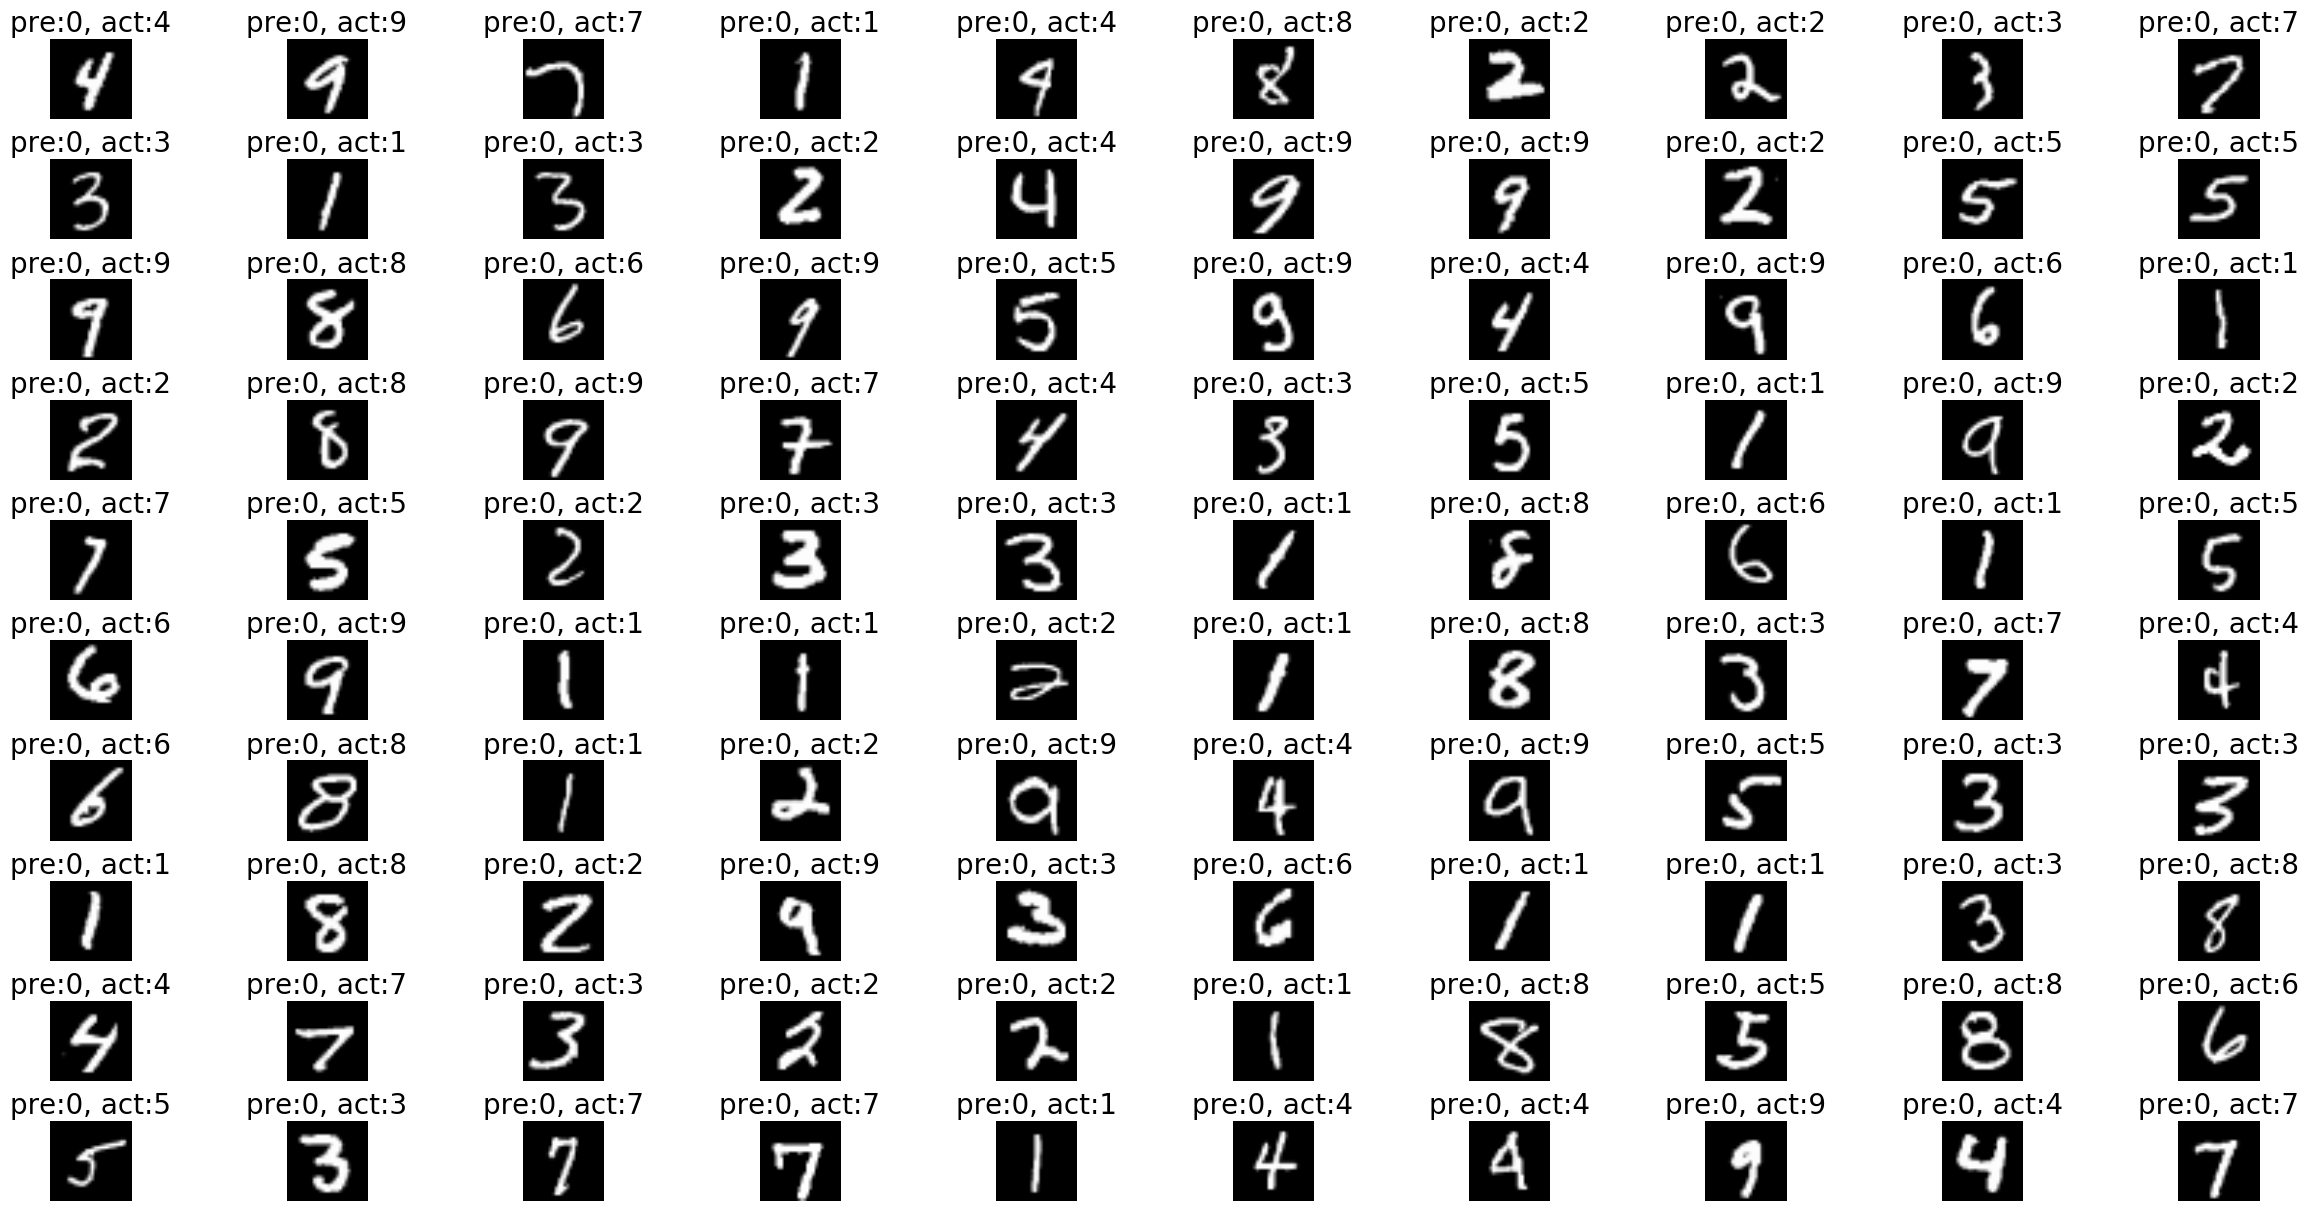

In [37]:
def plot_images (xval,yval, predictdata): 
    def displayimage(image):
        plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
        plt.axis('off')

    indices = np.array(np.where((yval != predictdata)==True))[0]
    indices = indices[0:100]
    index = 0
    rows = len(indices)/10
    cols = 10

    plt.figure(figsize=(30,15))
    for i in indices:
        index += 1
        plt.subplot(rows, cols, index)
        plt.subplots_adjust(hspace=.5)
        displayimage(xval[i])
        plt.title('pre:%i, act:%i' %( predictdata[i], yval[i]), fontsize = 20)
        
        
        
        
plot_images(xvalidation, yvalidation, pdf_predicted)

## Although we achieve a low accuracy of roughly 10% using our naively implemented Gaussian Classifier, this is somewhat expected due to the very low probabilities that resulted from using pdf instead of logpdf. This loss in precision is likely our cause of such high error. ##

Lets build the classifier again but this time using log probabilities

In [33]:
def Predict_log_pdf(data, prior, posteriors):
    Y = []
    for x in data:
        bayes_prob = []
        for c in classes:
            prob = [c, np.log(prior[c]) + posteriors[c].logpdf(x)]
            bayes_prob.append(prob)
        prediction = max(bayes_prob, key= lambda a: a[1])
        Y.append(prediction[0])
    return Y

logpdf_predicted = Predict_log_pdf(xvalidation, priors, posterior)

In [35]:
errors = (yvalidation != logpdf_predicted).sum()
total = xvalidation.shape[0]
print("Error rate: %d/%d = %f" % ((errors,total,(errors/float(total)))))

Error rate: 1921/10000 = 0.192100


## Our classifier now achieves roughly a 19% error rate simply using log probabilities, which also outperforms the sklearn GaussianNB prediction.##

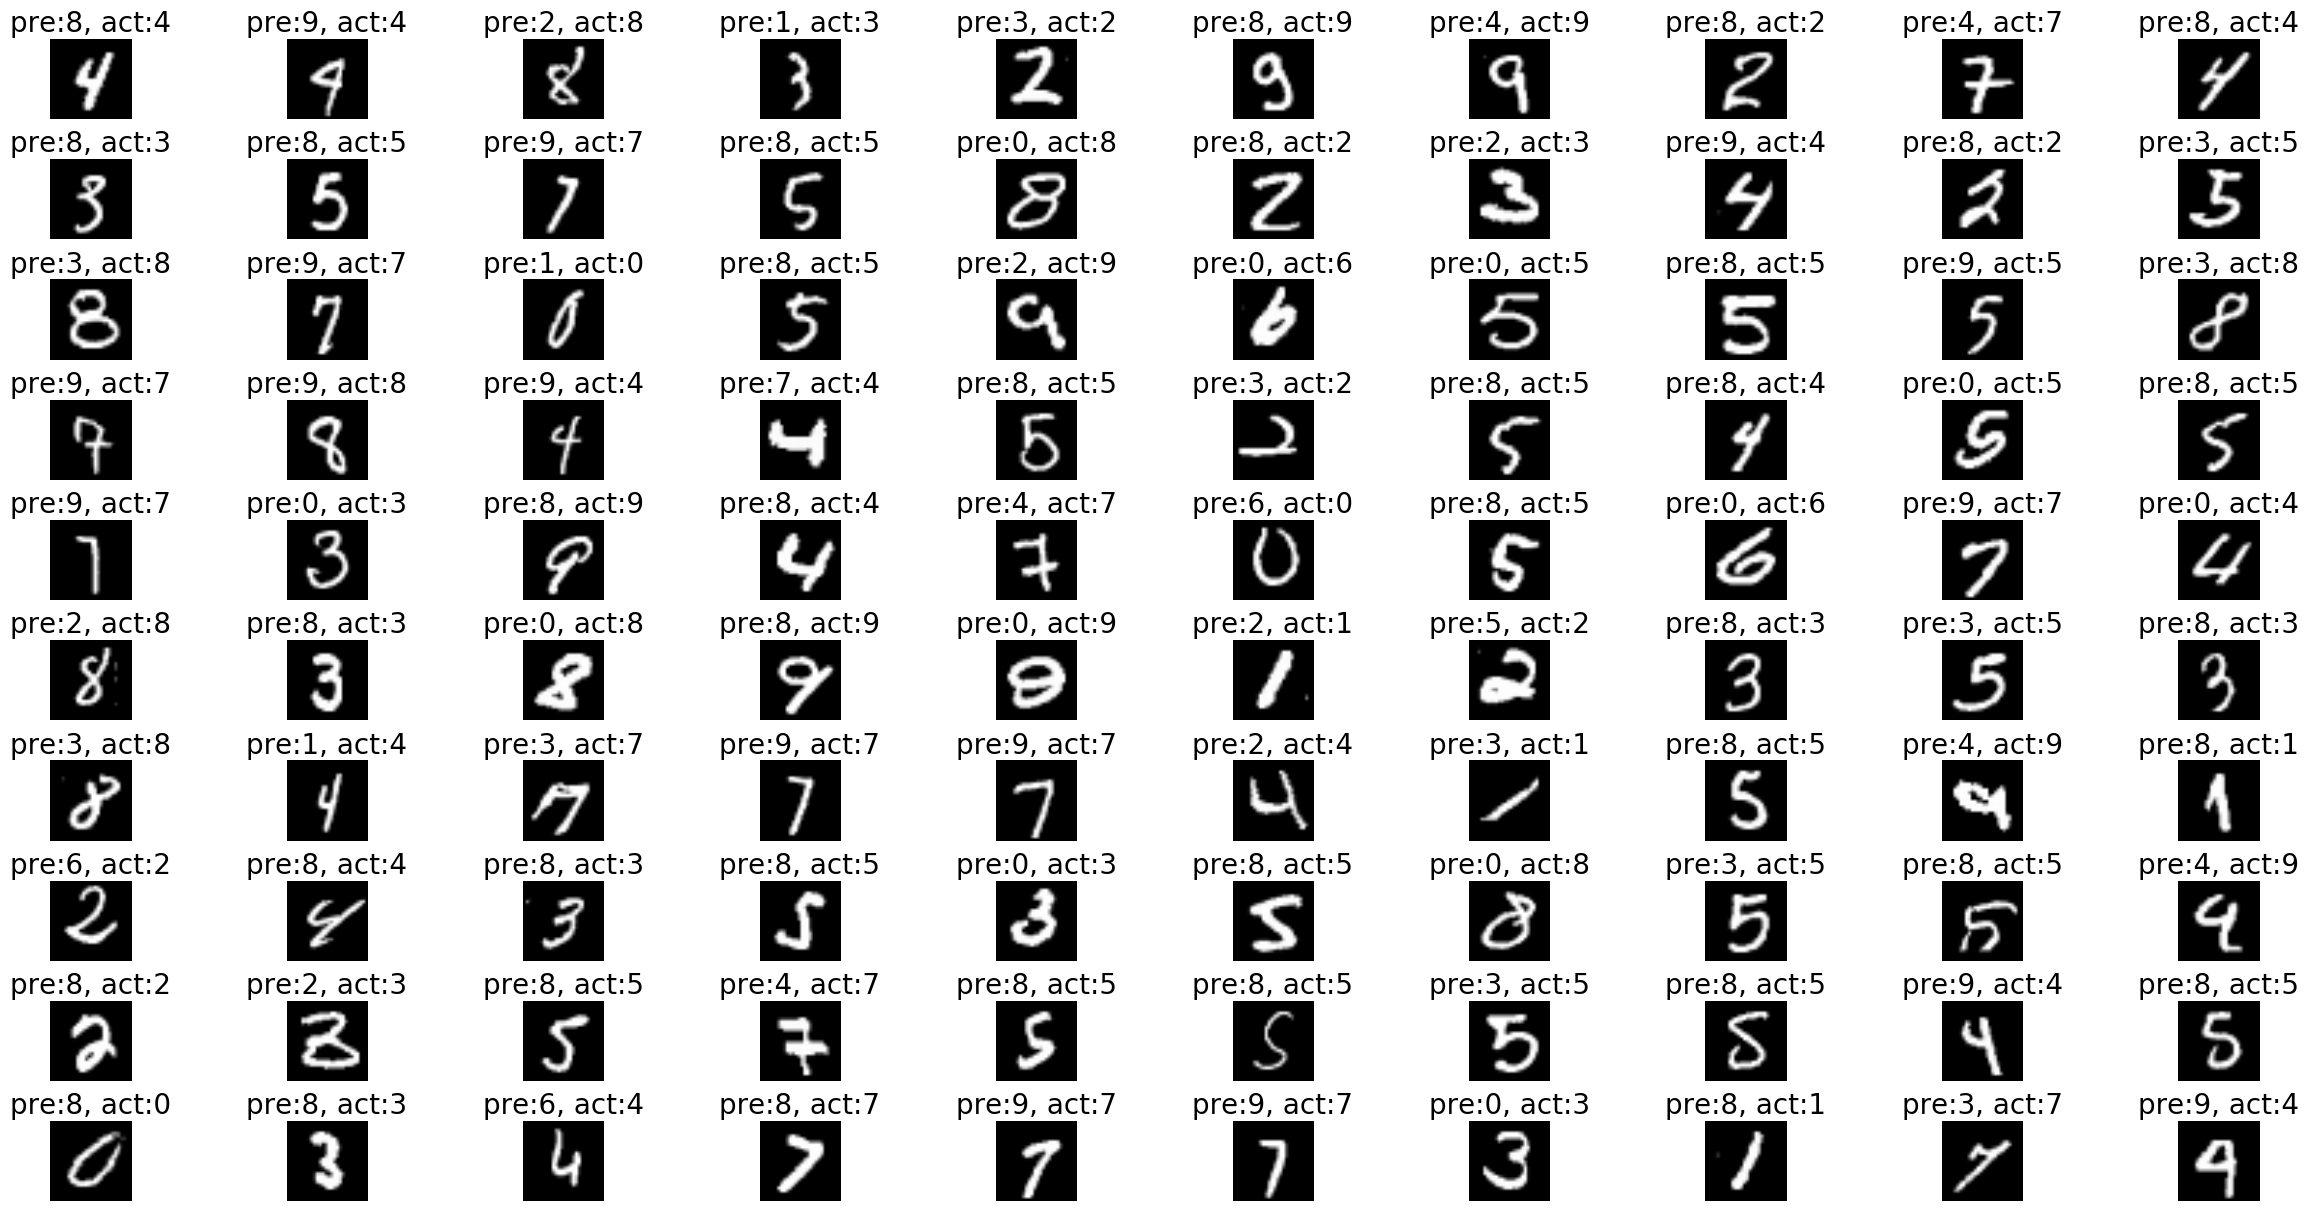

In [38]:
plot_images(xvalidation,yvalidation, logpdf_predicted)

In [39]:
print(metrics.classification_report(yvalidation, logpdf_predicted))
Accuracy = metrics.accuracy_score(yvalidation, logpdf_predicted)
print("Accuracy = " + str(Accuracy))
print('Error Rate = ' + str(1-Accuracy))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90       950
          1       0.94      0.92      0.93      1151
          2       0.85      0.82      0.83       990
          3       0.83      0.76      0.79      1044
          4       0.92      0.73      0.81       956
          5       0.94      0.58      0.72       916
          6       0.93      0.92      0.92       965
          7       0.93      0.64      0.75      1026
          8       0.56      0.86      0.68      1004
          9       0.64      0.90      0.75       998

avg / total       0.84      0.81      0.81     10000

Accuracy = 0.8079
Error Rate = 0.1921


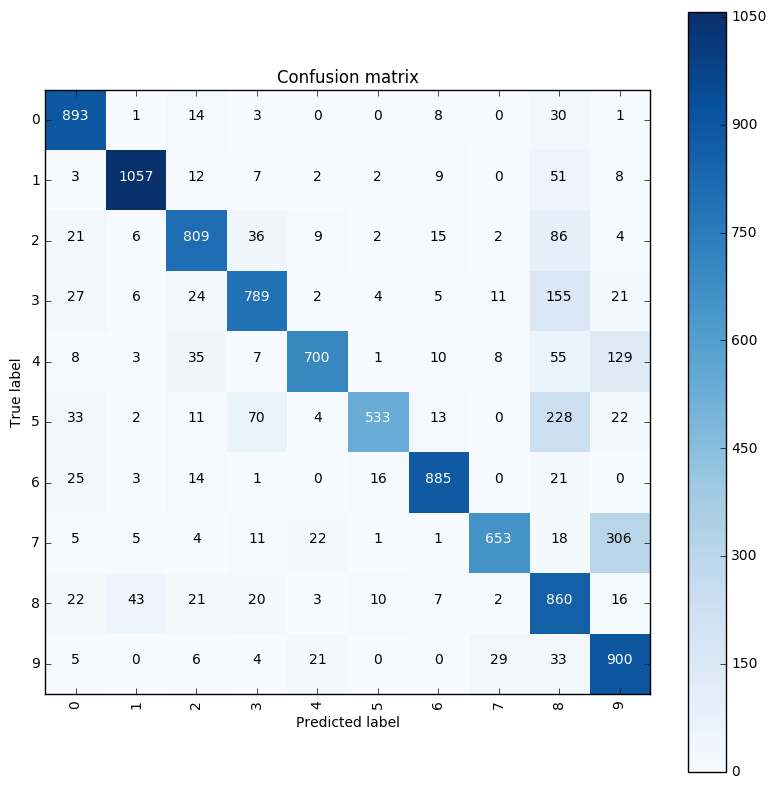

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(yvalidation, logpdf_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix')

plt.show()

## We can see the commonly misclassified numbers are 5s and 3s as 8s as well as 7s and 4s as 9s.##

(d) One last step is needed: it is important to smooth the covariance matrices, and the usual way to
do this is to add in cI, where c is some constant and I is the identity matrix. What value of c
is right? Use the validation set to help you choose. That is, choose the value of c for which the
resulting classifier makes the fewest mistakes on the validation set. What value of c did you get?


In [81]:
def get_smoothed_posteriors(class_list,smoothing_constant):
    posterior = []
    for c in class_list:
        grouping = get_each_class(c)
        mean = np.array(grouping.mean(0))[0]
        cov = np.cov(grouping, rowvar=0)
        cov_smoothed = cov + (smoothing_constant * np.eye(mean.shape[0]))
        p_x = multivariate_normal(mean, cov_smoothed, allow_singular=True)
        posterior.append(p_x)
    return posterior




smoothing_cs = [1,10,100,1000,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500,3600,3700,3800,3900]
error_rates = []
for sc in smoothing_cs:
    
    smoothed_posts = get_smoothed_posteriors (classes, sc)
    smoothed_log_predict = Predict_log_pdf(xvalidation, priors, smoothed_posts)

    errors = (yvalidation != smoothed_log_predict).sum()
    total = xvalidation.shape[0]
    error_rate = errors/float(total)
    error_rates.append(error_rate)
    print("Error rate for c= %s: %d/%d = %f" %((sc, errors, total, error_rate)))

Error rate for c= 1: 1671/10000 = 0.167100
Error rate for c= 10: 1306/10000 = 0.130600
Error rate for c= 100: 885/10000 = 0.088500
Error rate for c= 1000: 547/10000 = 0.054700
Error rate for c= 2000: 503/10000 = 0.050300
Error rate for c= 2100: 496/10000 = 0.049600
Error rate for c= 2200: 494/10000 = 0.049400
Error rate for c= 2300: 490/10000 = 0.049000
Error rate for c= 2400: 489/10000 = 0.048900
Error rate for c= 2500: 490/10000 = 0.049000
Error rate for c= 2600: 482/10000 = 0.048200
Error rate for c= 2700: 480/10000 = 0.048000
Error rate for c= 2800: 478/10000 = 0.047800
Error rate for c= 2900: 480/10000 = 0.048000
Error rate for c= 3000: 481/10000 = 0.048100
Error rate for c= 3100: 483/10000 = 0.048300
Error rate for c= 3200: 481/10000 = 0.048100
Error rate for c= 3300: 479/10000 = 0.047900
Error rate for c= 3400: 481/10000 = 0.048100
Error rate for c= 3500: 480/10000 = 0.048000
Error rate for c= 3600: 483/10000 = 0.048300
Error rate for c= 3700: 482/10000 = 0.048200
Error rate for

## Smoothing of 2800 seems to be the ideal constant with an error rate of 4.78%##

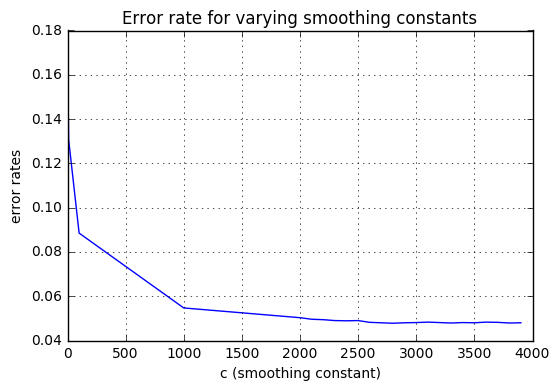

In [83]:
plt.plot(smoothing_cs, error_rates)
plt.grid()
plt.xlabel('c (smoothing constant)')
plt.ylabel('error rates')
plt.title('Error rate for varying smoothing constants')

(e) Turn in an iPython notebook that includes:

• All your code.

• Error rate on the MNIST test set.

• Out of the misclassified test digits, pick five at random and display them. For each instance,
list the posterior probabilities Pr(y|x) of each of the ten classes.  


In [84]:
error_rates = []

smoothed_posts = get_smoothed_posteriors (classes, 2800)
smoothed_log_predict = Predict_log_pdf(xtest, priors, smoothed_posts)

In [85]:
error_rates.append((ytest != smoothed_log_predict).sum()/float(xtest.shape[0]))
print("Error rate for c= %s: %d/%d = %f" %((smoothing_cs, errors, total, error_rate)))

Error rate for c= 2800: 480/10000 = 0.048000


## Error rate for MNIST Test set is 4.8% ##   




The Bayes probability found is 
[[0, -4172.8117484881759], [1, -4261.8229100298695], [2, -4125.0820688358526], [3, -4097.4740199423304], [4, -4198.1743240591668], [5, -4150.7697902162836], [6, -4275.895704120303], [7, -4079.3860585526381], [8, -4080.5137241780126], [9, -4115.7977503934289]]
For this random example the model predicted a 
7
Let's see how it compares to the actual image
Actual Image: 8


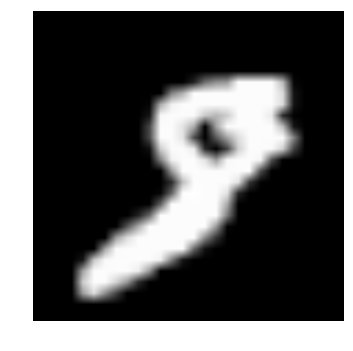

The Bayes probability found is 
[[0, -4088.0587990038143], [1, -4191.2594978556835], [2, -4027.7719041465584], [3, -4050.0747446370256], [4, -4132.0239957643171], [5, -4132.3271539578063], [6, -4173.6779151222054], [7, -4107.6842364381046], [8, -4017.252289228762], [9, -4088.5868673043001]]
For this random example the model predicted a 
8
Let's see how it compares to the actual image
Actual Image: 2


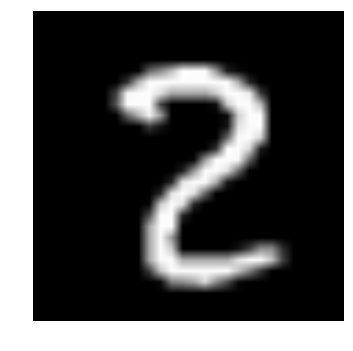

The Bayes probability found is 
[[0, -4095.1632675195137], [1, -4315.6882729242116], [2, -4123.4558668319742], [3, -4067.801970416489], [4, -4146.6580138139489], [5, -4067.1640427016118], [6, -4144.9648115890695], [7, -4170.4079524749122], [8, -4069.4792947154988], [9, -4124.4348739443476]]
For this random example the model predicted a 
5
Let's see how it compares to the actual image
Actual Image: 3


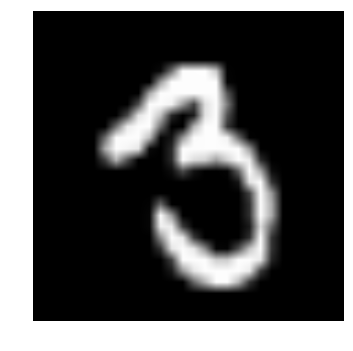

The Bayes probability found is 
[[0, -4155.4970939576724], [1, -4099.6597727685239], [2, -4056.0657663276147], [3, -4080.5365642725715], [4, -4044.2120685447489], [5, -4114.0369657187985], [6, -4143.6340950893054], [7, -4046.3175133649825], [8, -4076.6358960365578], [9, -4061.9441932984837]]
For this random example the model predicted a 
4
Let's see how it compares to the actual image
Actual Image: 7


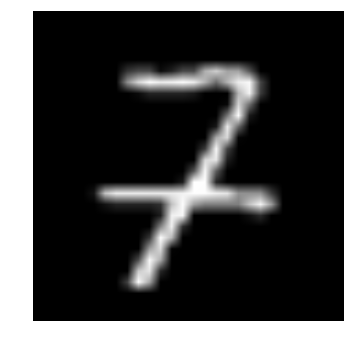

The Bayes probability found is 
[[0, -4083.1367001006092], [1, -4213.4692772825674], [2, -4156.1074201281253], [3, -4086.3470044576966], [4, -4179.7213554098826], [5, -4080.7861748480914], [6, -4102.603146974122], [7, -4178.901580724616], [8, -4088.0662488357571], [9, -4172.2689209329446]]
For this random example the model predicted a 
5
Let's see how it compares to the actual image
Actual Image: 8


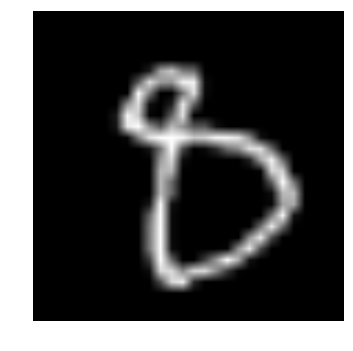

In [86]:
indices = np.array(np.where((ytest != smoothed_log_predict)==True))[0]

wrongs = random.sample(indices, 5)
actuals = ytest[wrongs]
misclassified_predicts = Predict_log_pdf(xtest[wrongs], priors, smoothed_posts)


for i in range(len(wrongs)):
    BP = []
    for c in classes:
        prob = [c, np.log(priors[c]) + smoothed_posts[c].logpdf(xtest[wrongs[i]])]
        BP.append(prob)
    
    print 'The Bayes probability found is \n', BP
    
    print 'For this random example the model predicted a \n', misclassified_predicts[i]
    print "Let's see how it compares to the actual image"
    print ("Actual Image: {}").format(actuals[i])
    displaychar(xtest[wrongs[i]])

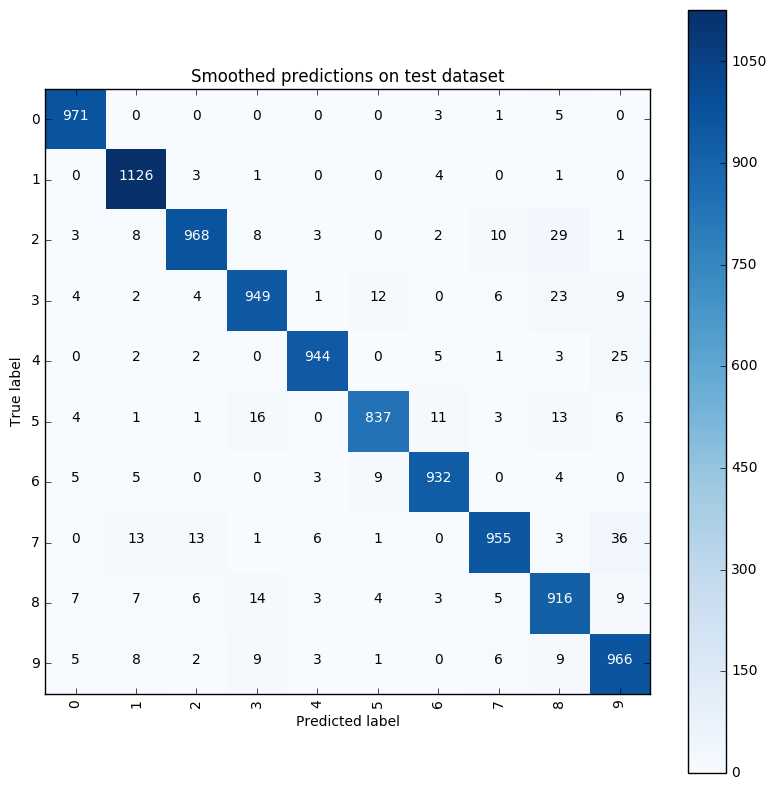

In [87]:
cnf_matrix = metrics.confusion_matrix(ytest, smoothed_log_predict)
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Smoothed predictions on test dataset')

plt.show()

Github link:

https://github.com/mas-dse/g4cheung/blob/master/DSE210/Homework_Worksheet_6--final.ipynb